<a href="https://colab.research.google.com/github/Chow05/Cars_detection_yolov10/blob/feature%2Fcolab/YOLOv10_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET**

In [ ]:
# https://drive.google.com/file/d/1Aci5Rwkunarae8o0ZkgFpnBRyfviQrAh/view?usp=sharing
!gdown '1Aci5Rwkunarae8o0ZkgFpnBRyfviQrAh'
!unzip -q '/content/cars_yolo_data.zip' -d '/content'

# **LIBRARIES**

In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10

In [ ]:
!pip install -q -r requirements.txt
!pip install -e .

# **TRAIN**

In [ ]:
from ultralytics import YOLOv10

# Nano version: yolov10n.pt
!wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt

MODEL_PATH = 'yolov10n.pt'
model = YOLOv10(MODEL_PATH)

YAML_PATH = '/content/yolo_data/data.yml'
EPOCHS = 25
IMG_SIZE = 640
BATCH_SIZE = 8

model.train(data=YAML_PATH,
            epochs=EPOCHS,
            batch=BATCH_SIZE,
            imgsz=IMG_SIZE)

# **VAL**

In [ ]:
TRAINED_MODEL_PATH = 'runs/detect/train/weights/best.pt'
model = YOLOv10(TRAINED_MODEL_PATH)

model.val(data=YAML_PATH,
          imgsz=IMG_SIZE)

# **PREDICT**


image 1/1 /content/test_model.jpg: 384x640 3 cars, 352.4ms
Speed: 5.6ms preprocess, 352.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


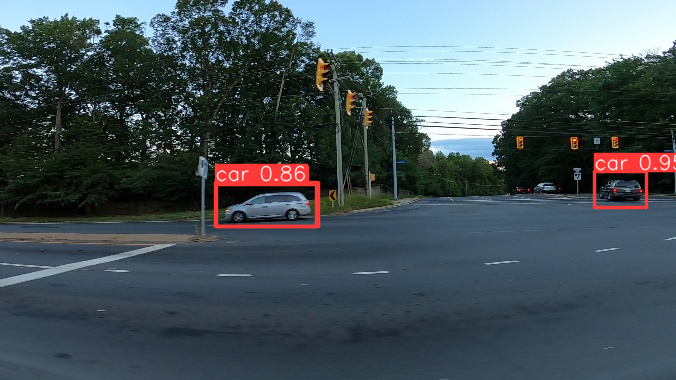

In [14]:
from google.colab.patches import cv2_imshow
import locale

locale.getpreferredencoding = lambda: "UTF-8"

TRAINED_MODEL_PATH = 'runs/detect/train/weights/best.pt'
model = YOLOv10(TRAINED_MODEL_PATH)

IMAGE_URL = '/content/test_model.jpg'
IMG_SIZE = 640
CONF_THRESHOLD = 0.3
results = model.predict(source=IMAGE_URL,
                       imgsz=IMG_SIZE,
                       conf=CONF_THRESHOLD)
annotated_img = results[0].plot()

cv2_imshow(annotated_img)